In [26]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

df = pd.read_csv('./features.csv', sep='\t', encoding='utf-8')

df = df.dropna().drop(columns=['Unnamed: 0']).reset_index(drop=True)
df['Biological Sex'] = df['Biological Sex'].map({'FEMALE': 0, 'MALE': 1})

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

label
PersNorm    71.114291
PersHigh    15.206683
PersLow     13.679025
Name: proportion, dtype: float64


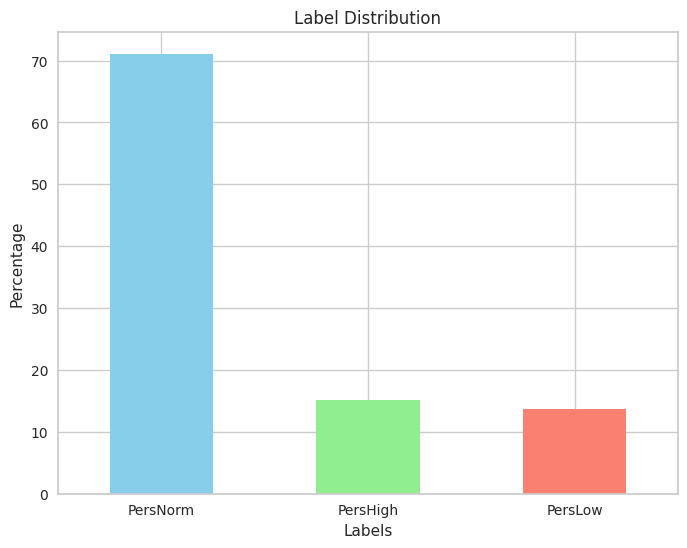

In [27]:
label_distribution = df['label'].value_counts(normalize=True) * 100
print(label_distribution)

plt.figure(figsize=(8, 6))
label_distribution.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [28]:
df['label'] = df['label'].map({'PersLow': 0, 'PersNorm': 1, 'PersHigh': 2})

X = df.drop(columns=['datetime', 'label', 'glucose'])
y = df['label']
data = pd.concat([X, y], axis=1)

rus = RandomUnderSampler(random_state=123)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 언더 샘플링 후 데이터프레임 결합
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

print(f"Data length: {len(data)}")
print(f"Data_resampled length: {len(data_resampled)}")

class_counts = data_resampled['label'].map({0:'PersLow',1:'PersNorm',2:'PersHigh'}).value_counts()
print(class_counts)

Data length: 30046
Data_resampled length: 12330
label
PersLow     4110
PersNorm    4110
PersHigh    4110
Name: count, dtype: int64


In [29]:
exp = setup(data=data_resampled,
            target='label',
            fold=10,        # 10-fold
            train_size=0.7, # training size 0.7:0.3
            fold_strategy='stratifiedkfold',
            fold_shuffle=True,
            feature_selection=True,
            feature_selection_estimator='rf',
            feature_selection_method='classic',
            n_features_to_select=15,
            session_id=123,
            use_gpu=False,
            verbose=True,
            n_jobs=4
            )

best_model = compare_models()

print(best_model)


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(12330, 76)"
4,Transformed data shape,"(12330, 16)"
5,Transformed train set shape,"(8631, 16)"
6,Transformed test set shape,"(3699, 16)"
7,Numeric features,75
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8585,0.9521,0.8585,0.8579,0.8564,0.7878,0.7894,1.3160
rf,Random Forest Classifier,0.8398,0.9445,0.8398,0.8392,0.8368,0.7596,0.7620,1.3670
lightgbm,Light Gradient Boosting Machine,0.7965,0.9213,0.7965,0.7952,0.7934,0.6948,0.6970,1.5210
dt,Decision Tree Classifier,0.7589,0.8192,0.7589,0.7575,0.7577,0.6383,0.6388,1.1340
knn,K Neighbors Classifier,0.7263,0.8752,0.7263,0.7260,0.7201,0.5895,0.5943,1.1470
gbc,Gradient Boosting Classifier,0.6559,0.0000,0.6559,0.6556,0.6506,0.4838,0.4877,2.9900
ada,Ada Boost Classifier,0.5463,0.0000,0.5463,0.5425,0.5413,0.3194,0.3213,1.2610
ridge,Ridge Classifier,0.5092,0.0000,0.5092,0.5125,0.5043,0.2638,0.2672,1.1290
lr,Logistic Regression,0.5084,0.0000,0.5084,0.5120,0.5050,0.2626,0.2652,1.8930
lda,Linear Discriminant Analysis,0.5082,0.0000,0.5082,0.5129,0.5042,0.2623,0.2652,1.1700


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=4,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [30]:
print("====Tuned model====")
tuned_model = tune_model(best_model)
predictions = predict_model(tuned_model)

final_model = finalize_model(tuned_model)
final_predictions = predict_model(final_model, data=data)

====Tuned model====


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5949,0.7849,0.5949,0.6135,0.5872,0.3924,0.4037
1,0.5886,0.7634,0.5886,0.5988,0.5775,0.3831,0.3931
2,0.6188,0.8053,0.6188,0.6277,0.6064,0.4283,0.4393
3,0.6199,0.7951,0.6199,0.6292,0.6089,0.4300,0.4402
4,0.5805,0.7728,0.5805,0.5867,0.5723,0.3707,0.3775
5,0.5771,0.7686,0.5771,0.5879,0.5658,0.3654,0.3750
6,0.5910,0.7789,0.5910,0.5891,0.5820,0.3863,0.3918
7,0.5910,0.7737,0.5910,0.5944,0.5794,0.3864,0.3952
8,0.5632,0.7552,0.5632,0.5695,0.5498,0.3447,0.3544


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8662,0.9546,0.8662,0.8656,0.8641,0.7993,0.8008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8805,0.9974,0.8805,0.9156,0.8855,0.7701,0.7910
